# Image In Frequencey


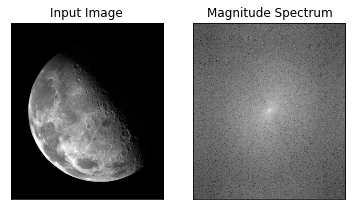

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('Images/Moon.jpg',0)
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('output Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Ideal Filter

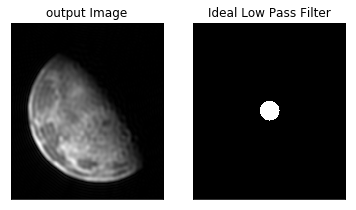

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('Images/Moon.jpg',0)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows,cols = img.shape
img1 = np.zeros([rows,cols, 2], dtype=np.uint8)
img2 = np.zeros([rows,cols])

d = 30
for u in range(0, rows):
    for v in range(0, cols):
        one = (((v - cols/2)**2) + ((u - rows/2)**2))**0.5    
        if one <= d:
            img1[u][v] = 1 
            img2[u][v] = 1
        else:
            img1[u][v] = 0 
            img2[u][v] = 0
       
        
multiimg = dft_shift * img1
f_ishift = np.fft.ifftshift(multiimg)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('output Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2, cmap = 'gray')
plt.title('Ideal Low Pass Filter'), plt.xticks([]), plt.yticks([])
plt.show()

# Butterworth Filter

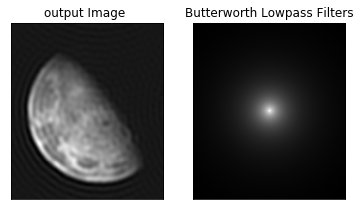

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('Images/Moon.jpg',0)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
rows,cols = img.shape
img1 = np.zeros([rows,cols, 2], dtype=np.uint8)
img2 = np.zeros([rows,cols])
d = 60
n=2
for u in range(0, rows):
    for v in range(0, cols):
        
        r=1/(1+(((v - cols/2)**2 + (u - rows/2)**2)**0.5)/d)**2*n
        img1[u][v] = 1/(1+(((v - cols/2)**2 + (u - rows/2)**2)**0.5)/d)**2*n 
        img2[u][v]=r

multiimg = dft_shift * img1 
f_ishift = np.fft.ifftshift(multiimg)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('output Image '), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2, cmap = 'gray')
plt.title('Butterworth Lowpass Filters'), plt.xticks([]), plt.yticks([])
plt.show()

# Gaussian  Lowpass Filters

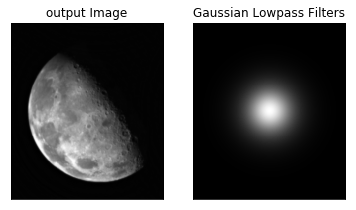

In [1]:
import cv2
import numpy as np
import math

from matplotlib import pyplot as plt
from math import *
img = cv2.imread('Images/Moon.jpg',0)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
rows,cols = img.shape
img1 = np.zeros([rows,cols, 2], dtype=np.uint8)
img2 = np.zeros([rows,cols])

d = 50
n=4
e=12
for u in range(0, rows):
    for v in range(0, cols):  
            x=e**math.exp(-((((v - cols/2)**2 + (u - rows/2)**2)**0.5)**2)/(2*d)**2) 
            img1[u][v] = e**math.exp(-((((v - cols/2)**2 + (u - rows/2)**2)**0.5)**2)/(2*d)**2) 
            img2[u][v]=x
            
multiimg = dft_shift * img1 
f_ishift = np.fft.ifftshift(multiimg)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('output Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2, cmap = 'gray')
plt.title('Gaussian Lowpass Filters'), plt.xticks([]), plt.yticks([])
plt.show()

# Gaussian Highpass Filters

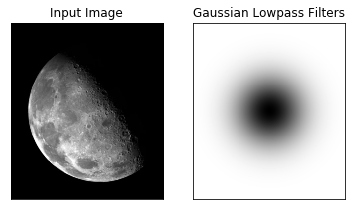

In [12]:
import cv2
import numpy as np
import math

from matplotlib import pyplot as plt
from math import *
img = cv2.imread('Images/Moon.jpg',0)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
rows,cols = img.shape
img1 = np.zeros([rows,cols, 2], dtype=np.uint8)
img2 = np.zeros([rows,cols])

d = 50
n=4
e=15
for u in range(0, rows):
    for v in range(0, cols):  
            x=1-e**1-math.exp(-((((v - cols/2)**2 + (u - rows/2)**2)**0.5)**2)/(2*d)**2) 
            img1[u][v] = 1-e**1-math.exp(-((((v - cols/2)**2 + (u - rows/2)**2)**0.5)**2)/(2*d)**2) 
            img2[u][v]=x
            
multiimg = dft_shift * img1 
f_ishift = np.fft.ifftshift(multiimg)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2, cmap = 'gray')
plt.title('Gaussian Lowpass Filters'), plt.xticks([]), plt.yticks([])
plt.show()